In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Cargar el dataset
data = pd.read_csv("/content/drive/MyDrive/Datasets/emails.csv")

In [ ]:
# 2. Seleccionar las columnas necesarias
X = data.drop(columns=['Email No.', 'Prediction'])  # Características
y = data['Prediction']  # Etiqueta

In [ ]:
# 3. División del dataset en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 4. Entrenar el modelo SVM
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# 5. Predecir y evaluar
y_pred = model.predict(X_test)

In [ ]:
# 6. Evaluación del rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Matriz de confusión y reporte de clasificación
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9594
Confusion Matrix:
 [[715  24]
 [ 18 278]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       739
           1       0.92      0.94      0.93       296

    accuracy                           0.96      1035
   macro avg       0.95      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035



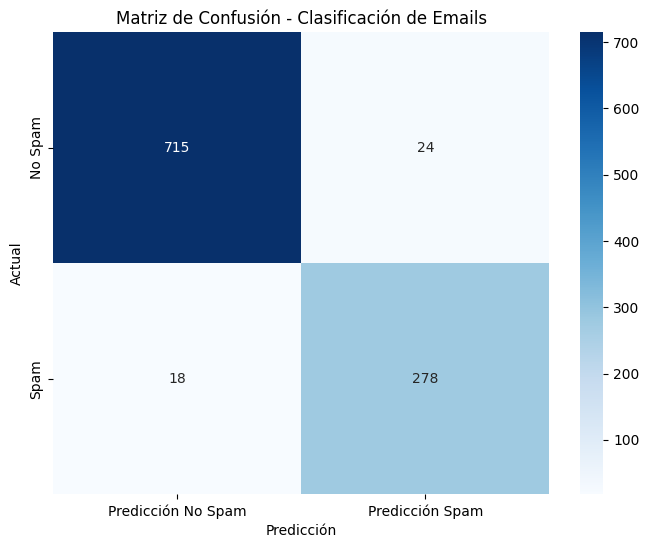

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 7. Visualización de la matriz de confusión
conf_matrix_df = pd.DataFrame(conf_matrix, index=['No Spam', 'Spam'], columns=['Predicción No Spam', 'Predicción Spam'])

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión - Clasificación de Emails')
plt.show()